🔹 First 5 rows of the dataset:
   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related 

/tmp/ipython-input-1-545691826.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


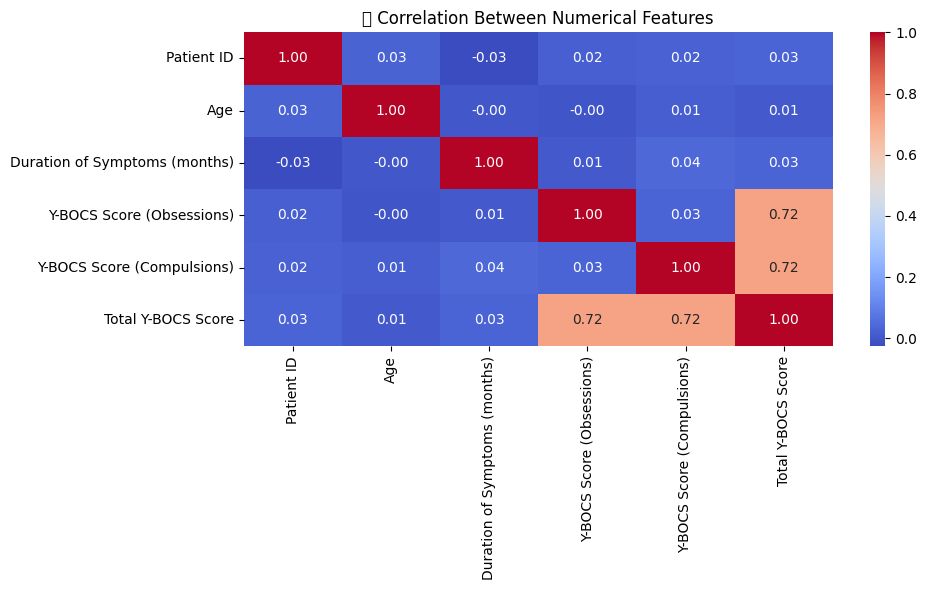

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD Patient Dataset_ Demographics & Clinical Data.csv")  # Replace with your file name if different

# 📌 Show the first few rows
print("🔹 First 5 rows of the dataset:")
print(df.head())

# 📊 Basic Descriptive Statistics for Numerical Columns
print("\n🔹 Descriptive Statistics:")
print(df.describe())

# ➕ Optional: Create a new column for Total OCD severity
df["Total Y-BOCS Score"] = df["Y-BOCS Score (Obsessions)"] + df["Y-BOCS Score (Compulsions)"]

# 🧮 Median and Mode
print("\n🔹 Median of Numerical Columns:")
print(df.median(numeric_only=True))

print("\n🔹 Mode of Numerical Columns:")
print(df.mode(numeric_only=True).iloc[0])

# 📉 Standard Deviation
print("\n🔹 Standard Deviation:")
print(df.std(numeric_only=True))

# 🔗 Correlation Matrix
print("\n🔹 Correlation Matrix:")
print(df.corr(numeric_only=True))

# 📈 Heatmap for Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


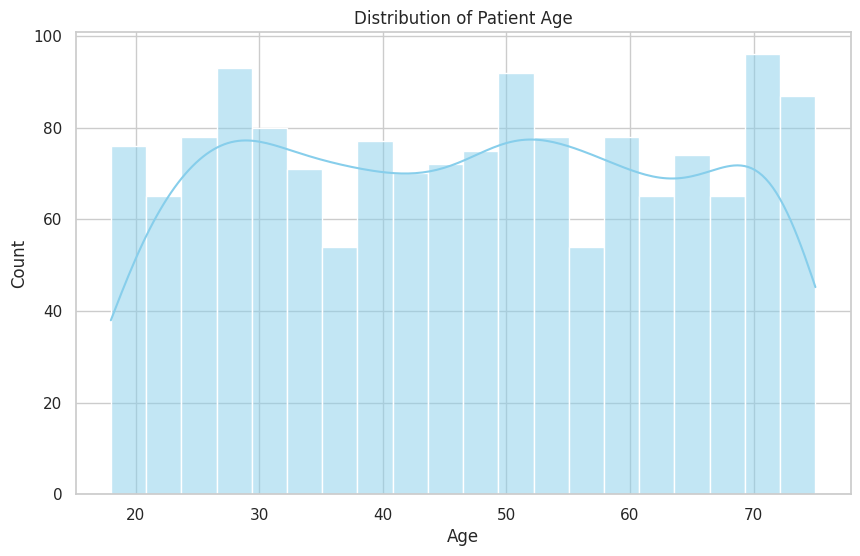

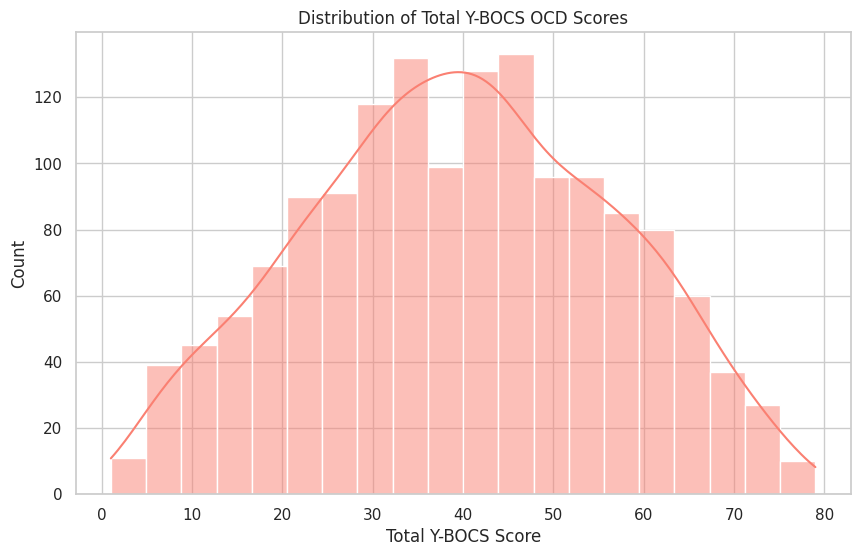

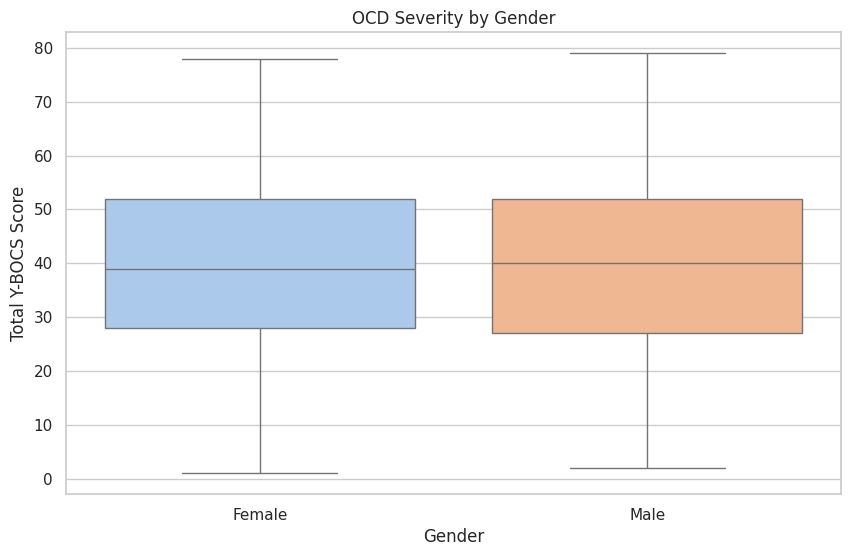

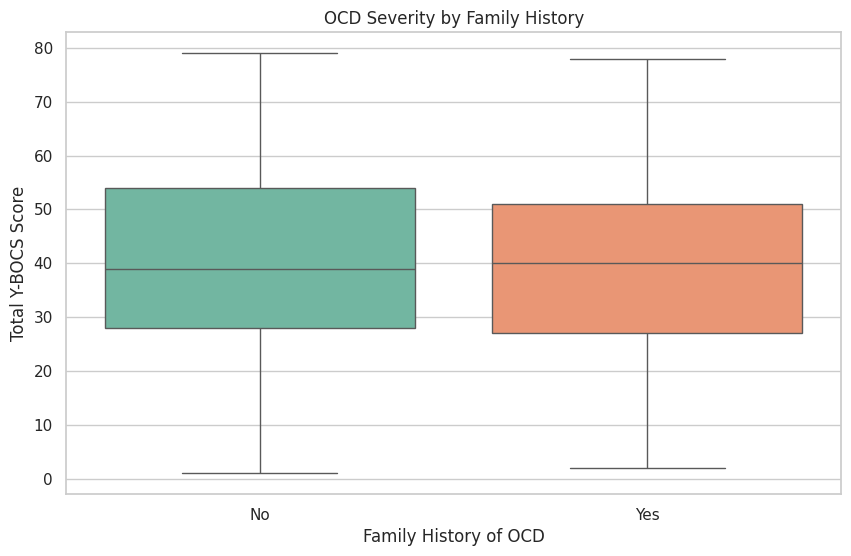

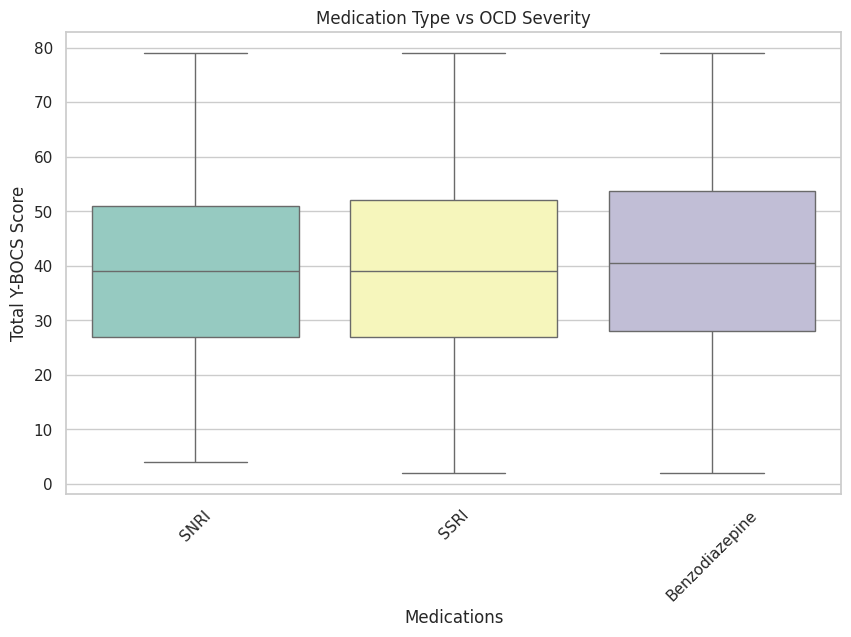

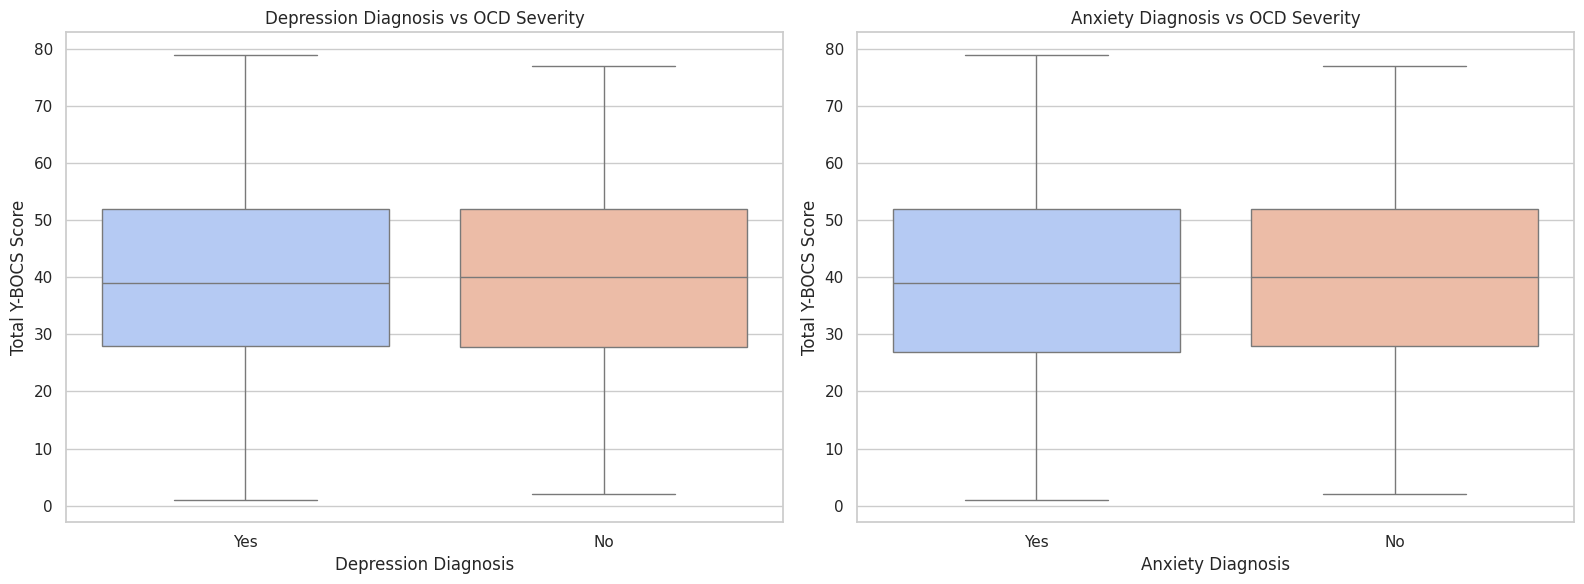

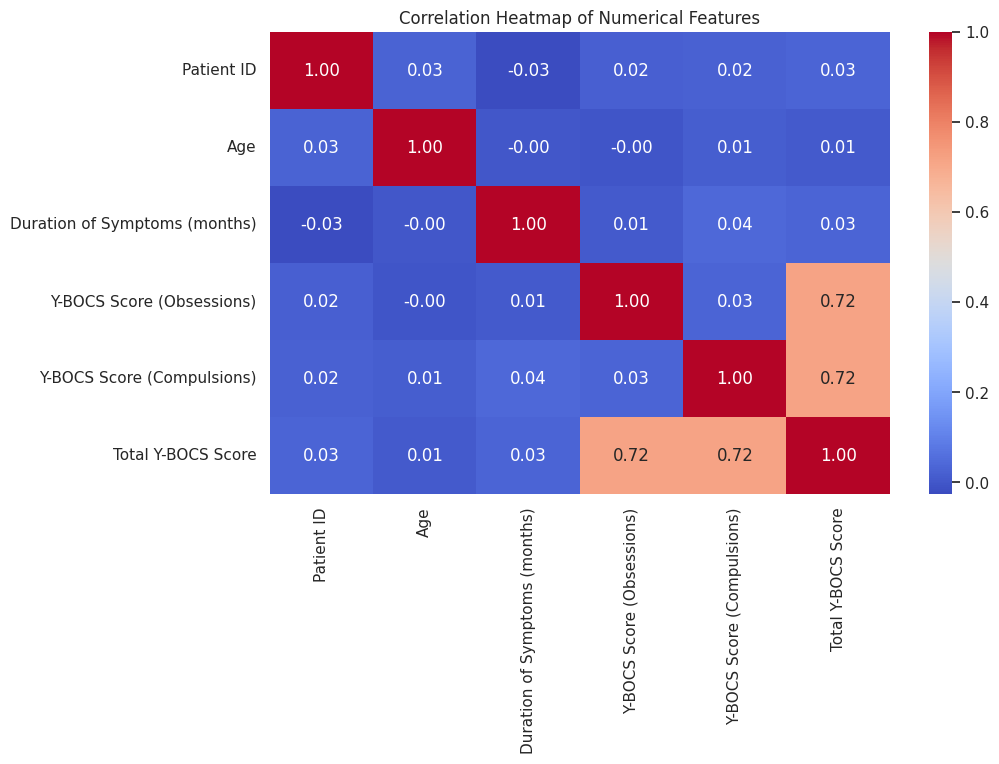

In [ ]:
# EDA Code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD Patient Dataset_ Demographics & Clinical Data.csv")

# Create Total OCD Score column
df["Total Y-BOCS Score"] = df["Y-BOCS Score (Obsessions)"] + df["Y-BOCS Score (Compulsions)"]

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Age Distribution
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Y-BOCS Score Distributions
sns.histplot(df["Total Y-BOCS Score"], bins=20, kde=True, color="salmon")
plt.title("Distribution of Total Y-BOCS OCD Scores")
plt.xlabel("Total Y-BOCS Score")
plt.ylabel("Count")
plt.show()

# 3️⃣ Gender vs OCD Severity
sns.boxplot(x="Gender", y="Total Y-BOCS Score", hue="Gender", data=df, palette="pastel", legend=False)

plt.title("OCD Severity by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Y-BOCS Score")
plt.show()

# 4️⃣ Family History of OCD vs Severity
sns.boxplot(x="Family History of OCD", y="Total Y-BOCS Score", hue="Family History of OCD", data=df, palette="Set2", legend=False)

plt.title("OCD Severity by Family History")
plt.xlabel("Family History of OCD")
plt.ylabel("Total Y-BOCS Score")
plt.show()

# 5️⃣ Medication vs Severity
sns.boxplot(x="Medications", y="Total Y-BOCS Score", hue="Medications", data=df, palette="Set3", legend=False)

plt.title("Medication Type vs OCD Severity")
plt.xlabel("Medications")
plt.ylabel("Total Y-BOCS Score")
plt.xticks(rotation=45)
plt.show()

# 6️⃣ Depression/Anxiety Diagnosis vs Severity
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Depression
sns.boxplot(x="Depression Diagnosis", y="Total Y-BOCS Score", data=df,
            ax=axes[0], hue="Depression Diagnosis", palette="coolwarm", legend=False)
axes[0].set_title("Depression Diagnosis vs OCD Severity")
axes[0].set_xlabel("Depression Diagnosis")
axes[0].set_ylabel("Total Y-BOCS Score")

# Anxiety
sns.boxplot(x="Anxiety Diagnosis", y="Total Y-BOCS Score", data=df,
            ax=axes[1], hue="Anxiety Diagnosis", palette="coolwarm", legend=False)
axes[1].set_title("Anxiety Diagnosis vs OCD Severity")
axes[1].set_xlabel("Anxiety Diagnosis")
axes[1].set_ylabel("Total Y-BOCS Score")

plt.tight_layout()
plt.show()

# 7️⃣ Heatmap of Numeric Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# STEP 3: DATA CLEANING & ENCODING
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD Patient Dataset_ Demographics & Clinical Data.csv")

# 1️⃣ Rename columns: Remove spaces & special characters
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# 2️⃣ Create Total Y-BOCS Score
df["Total_YBOCS_Score"] = df["Y-BOCS_Score_Obsessions"] + df["Y-BOCS_Score_Compulsions"]

# 3️⃣ Convert date column to datetime
df["OCD_Diagnosis_Date"] = pd.to_datetime(df["OCD_Diagnosis_Date"], errors='coerce')

# 4️⃣ Check missing values
print("\n🔍 Missing values (before):")
print(df.isnull().sum())

# 5️⃣ Fill missing values
df["Previous_Diagnoses"] = df["Previous_Diagnoses"].fillna("None")
df["Medications"] = df["Medications"].fillna("None")

# 6️⃣ Drop rows with critical missing values (if any)
df.dropna(subset=["Age", "Gender", "Total_YBOCS_Score"], inplace=True)

# 7️⃣ Label Encoding for Binary Columns
binary_cols = ["Gender", "Depression_Diagnosis", "Anxiety_Diagnosis", "Family_History_of_OCD"]
for col in binary_cols:
    df[col] = df[col].map({"Male": 0, "Female": 1, "No": 0, "Yes": 1})

# 8️⃣ One-Hot Encoding for Multi-Class Categorical Columns
df = pd.get_dummies(df, columns=[
    "Ethnicity", "Marital_Status", "Education_Level",
    "Obsession_Type", "Compulsion_Type", "Medications", "Previous_Diagnoses"
], drop_first=True)

# 9️⃣ Preview the cleaned data
print("\n✅ Cleaned dataset preview:")
print(df.head())

print("\n🧼 Cleaned dataset shape:", df.shape)

# 🔟 Save cleaned dataset
df.to_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD_Cleaned_Data.csv", index=False)

print("✅ Cleaned dataset saved as 'OCD_Cleaned_Data.csv'")



🔍 Missing values (before):
Patient_ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital_Status                   0
Education_Level                  0
OCD_Diagnosis_Date               0
Duration_of_Symptoms_months      0
Previous_Diagnoses             248
Family_History_of_OCD            0
Obsession_Type                   0
Compulsion_Type                  0
Y-BOCS_Score_Obsessions          0
Y-BOCS_Score_Compulsions         0
Depression_Diagnosis             0
Anxiety_Diagnosis                0
Medications                    386
Total_YBOCS_Score                0
dtype: int64

✅ Cleaned dataset preview:
   Patient_ID  Age  Gender OCD_Diagnosis_Date  Duration_of_Symptoms_months  \
0        1018   32       1         2016-07-15                          203   
1        2406   69       0         2017-04-28                          180   
2        1188   57       0         2018-02-02                      

🔍 Random Forest Model Performance:
MAE  : 0.57
MSE  : 0.60
RMSE : 0.77
R²   : 1.00
Cross-Validated R² scores: [0.99745027 0.99823808 0.99785083 0.99767337 0.99778567]
Average CV R²: 0.9977996435742694

🔍 Linear Regression R²: 1.0


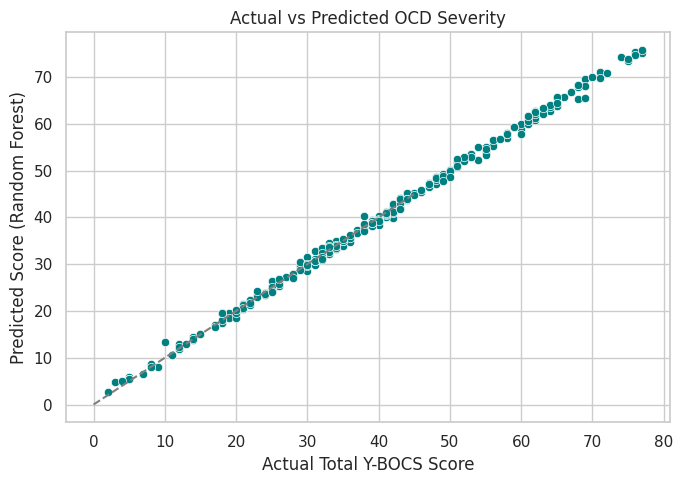

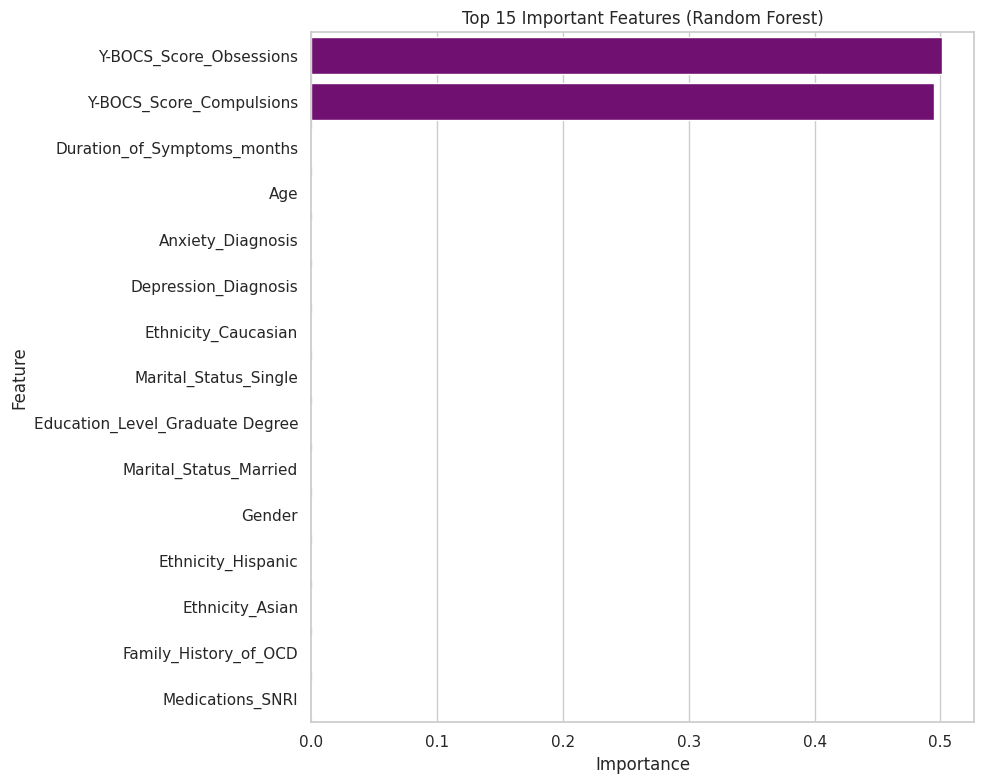

['/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/rf_ocd_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1️⃣ Load cleaned data
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD_Cleaned_Data.csv")

# 2️⃣ Define features and target
X = df.drop(["Total_YBOCS_Score", "OCD_Diagnosis_Date", "Patient_ID"], axis=1)
y = df["Total_YBOCS_Score"]

# 3️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5️⃣ Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)

# 6️⃣ Cross-validation on Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# 7️⃣ Compare with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)

# 📊 Print Results
print("🔍 Random Forest Model Performance:")
print(f"MAE  : {rf_mae:.2f}")
print(f"MSE  : {rf_mse:.2f}")
print(f"RMSE : {rf_rmse:.2f}")
print(f"R²   : {rf_r2:.2f}")
print("Cross-Validated R² scores:", rf_cv_scores)
print("Average CV R²:", np.mean(rf_cv_scores))

print("\n🔍 Linear Regression R²:", lr_r2)

# 8️⃣ Plot Actual vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='teal')
plt.plot([0, 45], [0, 45], '--', color='gray')
plt.xlabel("Actual Total Y-BOCS Score")
plt.ylabel("Predicted Score (Random Forest)")
plt.title("Actual vs Predicted OCD Severity")
plt.grid(True)
plt.tight_layout()
plt.show()

# 9️⃣ Feature Importance
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

# ✅ Updated: No FutureWarning
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15), color="purple")  # Single color
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


joblib.dump(rf_model, "/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/rf_ocd_model.pkl")


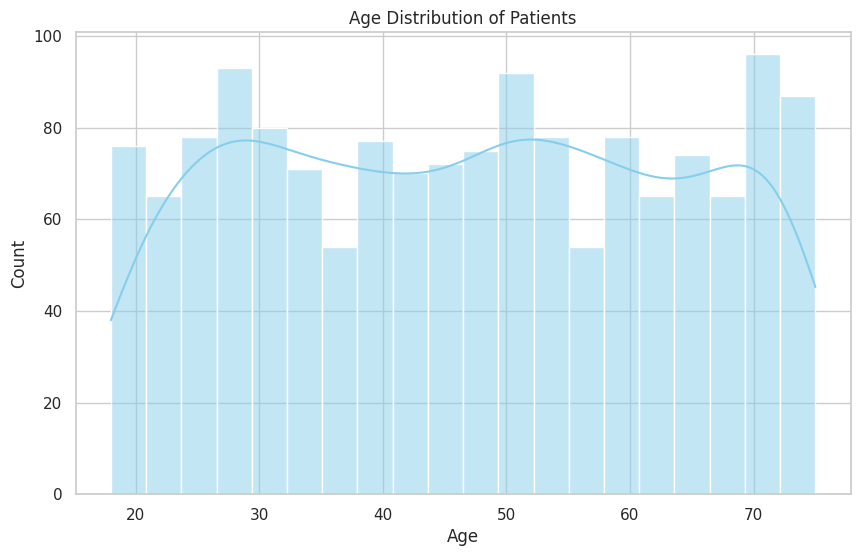

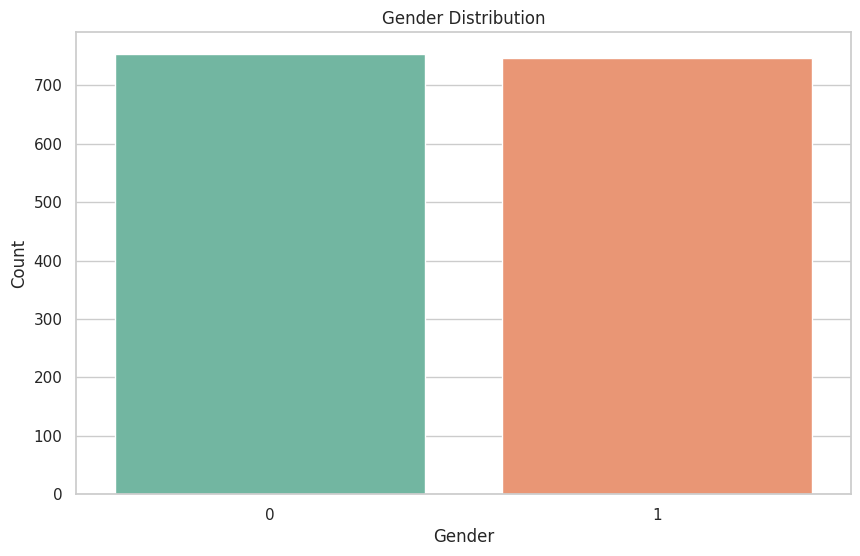

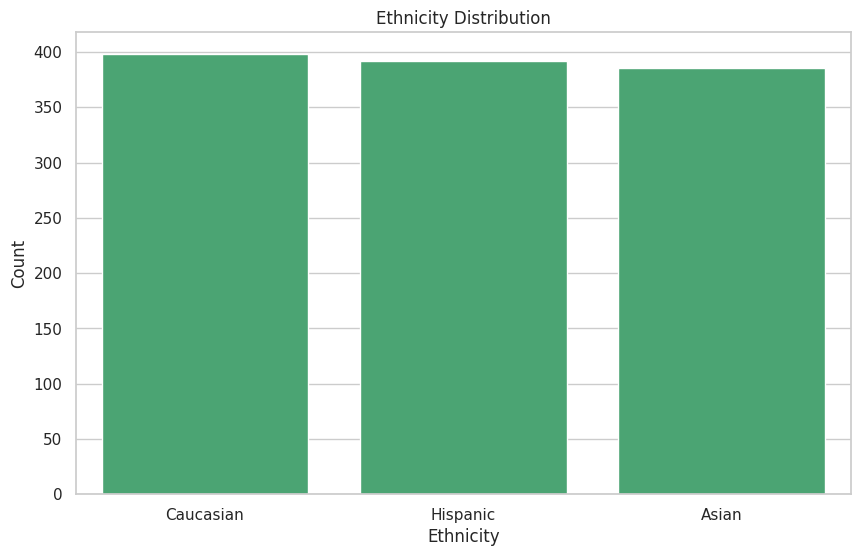

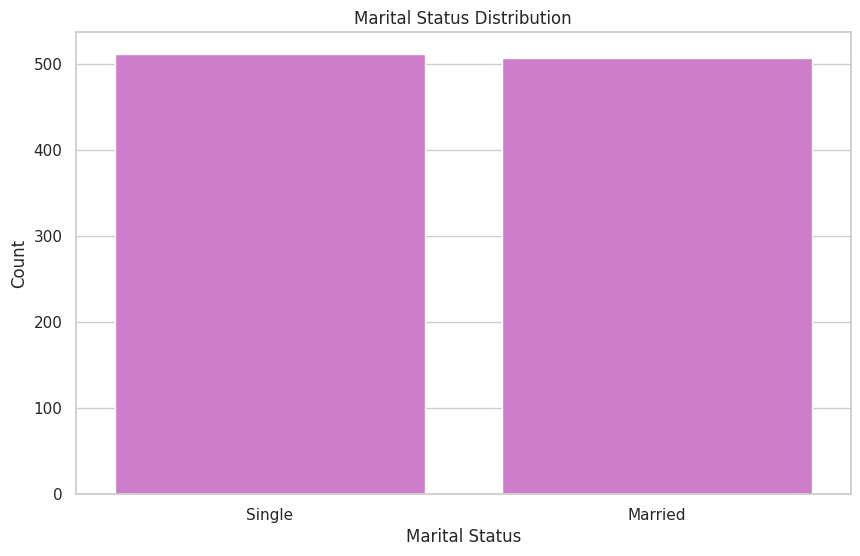

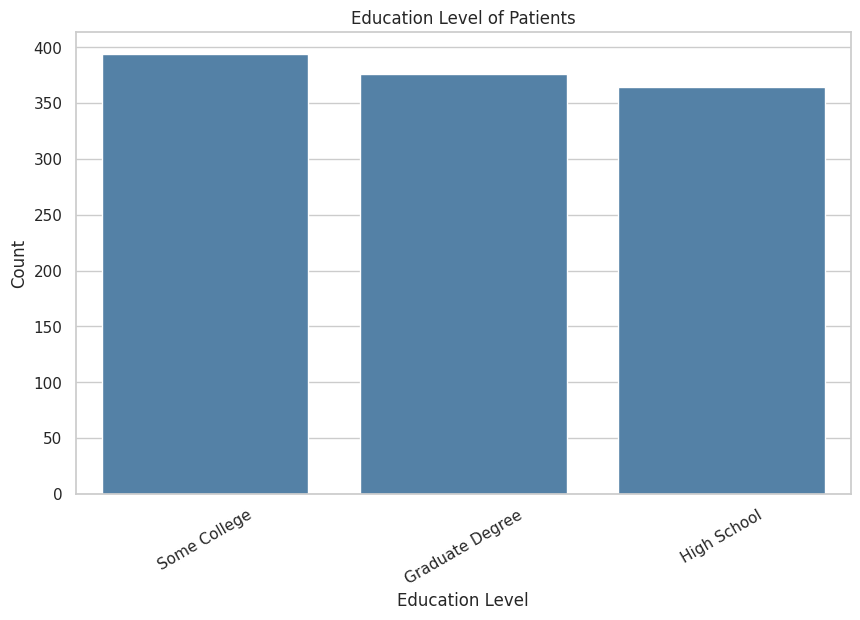

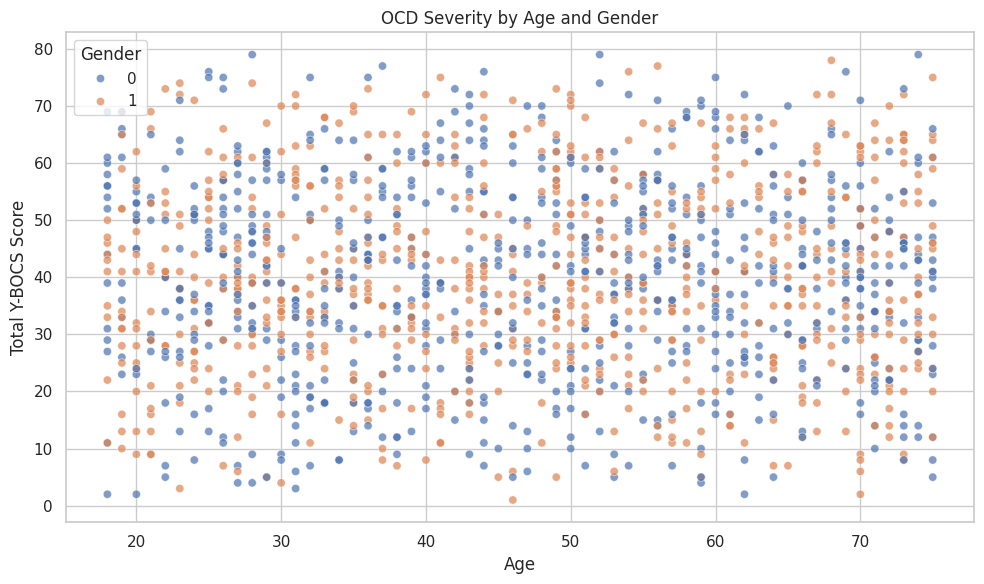

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD_Cleaned_Data.csv")  # ← Replace with your actual file path

# Optional: Strip spaces and standardize
df.columns = df.columns.str.strip()

# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Age Distribution
sns.histplot(data=df, x="Age", bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2️⃣ Gender Distribution
sns.countplot(data=df, x="Gender", palette="Set2", hue="Gender", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3️⃣ Ethnicity Distribution
ethnicity_cols = ["Ethnicity_Asian", "Ethnicity_Caucasian", "Ethnicity_Hispanic"]
ethnicity_counts = df[ethnicity_cols].sum().sort_values(ascending=False)
ethnicity_df = pd.DataFrame({
    "ethnicity": ethnicity_counts.index.str.replace("Ethnicity_", ""),
    "count": ethnicity_counts.values
})
sns.barplot(data=ethnicity_df, x="ethnicity", y="count", color="mediumseagreen")
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

# 4️⃣ Marital Status Distribution
marital_cols = ["Marital_Status_Married", "Marital_Status_Single"]
marital_counts = df[marital_cols].sum().sort_values(ascending=False)
marital_df = pd.DataFrame({
    "marital_status": marital_counts.index.str.replace("Marital_Status_", ""),
    "count": marital_counts.values
})
sns.barplot(data=marital_df, x="marital_status", y="count", color="orchid")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

# 5️⃣ Education Level Distribution
education_cols = [
    "Education_Level_High School",
    "Education_Level_Some College",
    "Education_Level_Graduate Degree"
]
education_counts = df[education_cols].sum().sort_values(ascending=False)
education_df = pd.DataFrame({
    "education_level": education_counts.index.str.replace("Education_Level_", ""),
    "count": education_counts.values
})
sns.barplot(data=education_df, x="education_level", y="count", color="steelblue")
plt.title("Education Level of Patients")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# 6️⃣ OCD Severity by Age and Gender
sns.scatterplot(data=df, x="Age", y="Total_YBOCS_Score", hue="Gender", alpha=0.7)
plt.title("OCD Severity by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Y-BOCS Score")
plt.grid(True)
plt.tight_layout()
plt.show()


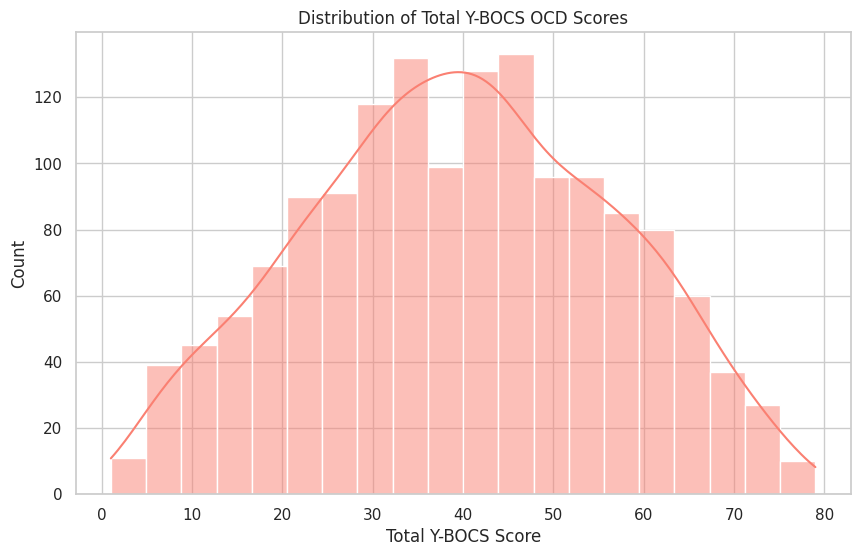

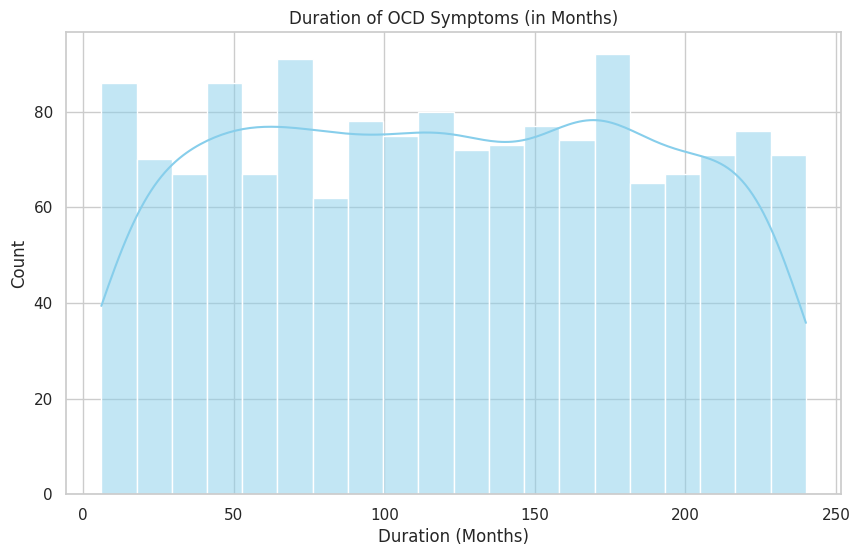

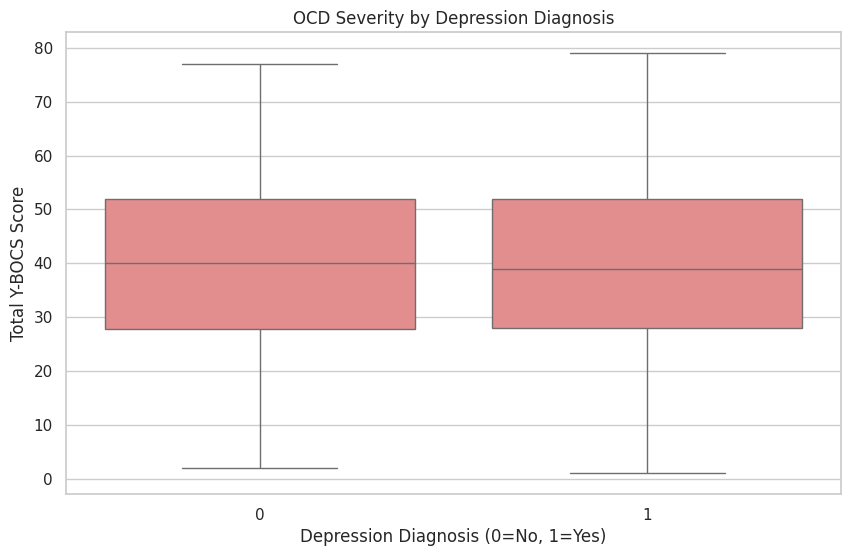

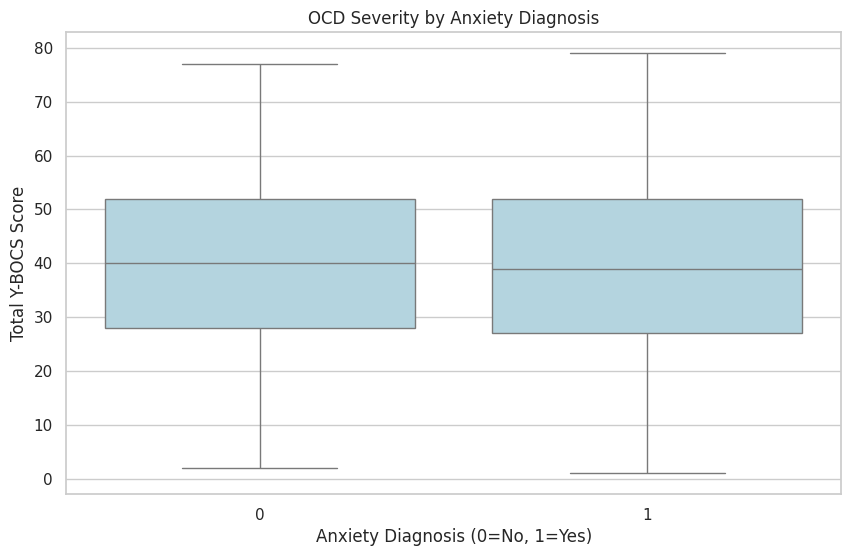

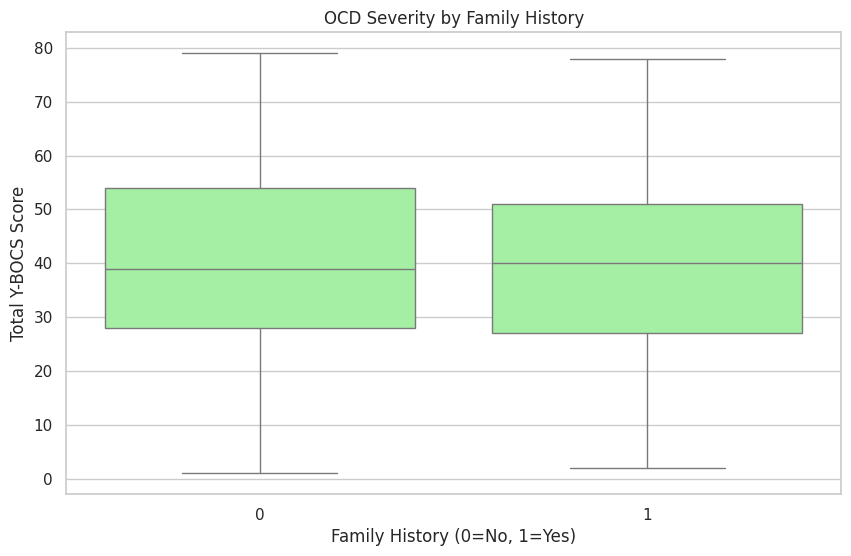

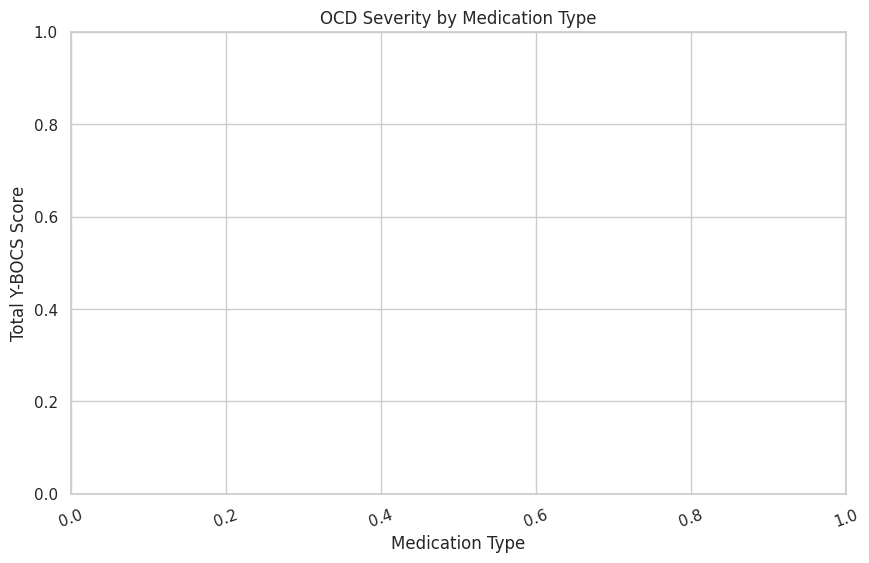

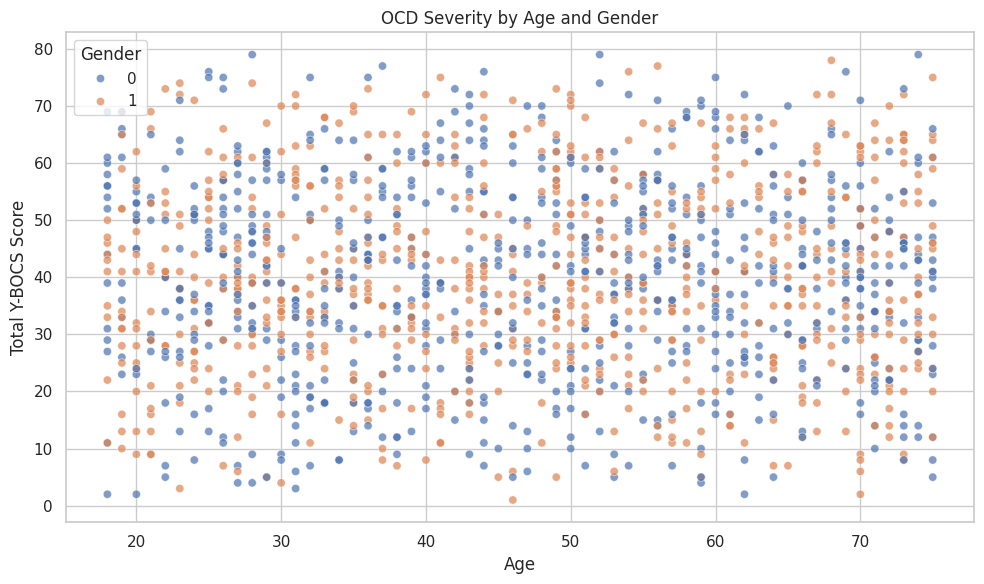

In [ ]:
# Clinical Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD_Cleaned_Data.csv")  # ⬅️ Replace with your actual file path

# Standardize column names (optional but helpful)
df.columns = df.columns.str.strip()

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1️⃣ Distribution of Total Y-BOCS Score
sns.histplot(df["Total_YBOCS_Score"], bins=20, kde=True, color="salmon")
plt.title("Distribution of Total Y-BOCS OCD Scores")
plt.xlabel("Total Y-BOCS Score")
plt.ylabel("Count")
plt.show()

# 2️⃣ Duration of Symptoms Distribution
sns.histplot(df["Duration_of_Symptoms_months"], bins=20, kde=True, color="skyblue")
plt.title("Duration of OCD Symptoms (in Months)")
plt.xlabel("Duration (Months)")
plt.ylabel("Count")
plt.show()

# 3️⃣ Depression Diagnosis vs OCD Severity
sns.boxplot(data=df, x="Depression_Diagnosis", y="Total_YBOCS_Score", color="lightcoral")
plt.title("OCD Severity by Depression Diagnosis")
plt.xlabel("Depression Diagnosis (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()

# 4️⃣ Anxiety Diagnosis vs OCD Severity
sns.boxplot(data=df, x="Anxiety_Diagnosis", y="Total_YBOCS_Score", color="lightblue")
plt.title("OCD Severity by Anxiety Diagnosis")
plt.xlabel("Anxiety Diagnosis (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()

# 5️⃣ Family History of OCD vs Severity
sns.boxplot(data=df, x="Family_History_of_OCD", y="Total_YBOCS_Score", color="palegreen")
plt.title("OCD Severity by Family History")
plt.xlabel("Family History (0=No, 1=Yes)")
plt.ylabel("Total Y-BOCS Score")
plt.show()

# 6️⃣ Medication Type vs OCD Severity (Only Top 3 Medications)
med_cols = ["Medications_None", "Medications_SNRI", "Medications_SSRI"]

# Create readable labels
for med in med_cols:
    med_name = med.split("_")[-1].upper()
    df[med + "_label"] = df[med].map({0: f"No {med_name}", 1: f"{med_name}"})

# Melt the labeled columns
label_cols = [col + "_label" for col in med_cols]
melted_med = pd.melt(df, id_vars=["Total_YBOCS_Score"], value_vars=label_cols, var_name="Medication_Type", value_name="Medication_Label")

# Drop NaN (if any)
melted_med = melted_med.dropna(subset=["Medication_Label"])

# Plot (stripplot or boxplot based on preference)
sns.boxplot(data=melted_med, x="Medication_Label", y="Total_YBOCS_Score", palette="pastel")
plt.title("OCD Severity by Medication Type")
plt.xlabel("Medication Type")
plt.ylabel("Total Y-BOCS Score")
plt.xticks(rotation=20)
plt.show()

# 7️⃣ OCD Severity by Age and Gender
sns.scatterplot(data=df, x="Age", y="Total_YBOCS_Score", hue="Gender", alpha=0.7)
plt.title("OCD Severity by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Total Y-BOCS Score")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


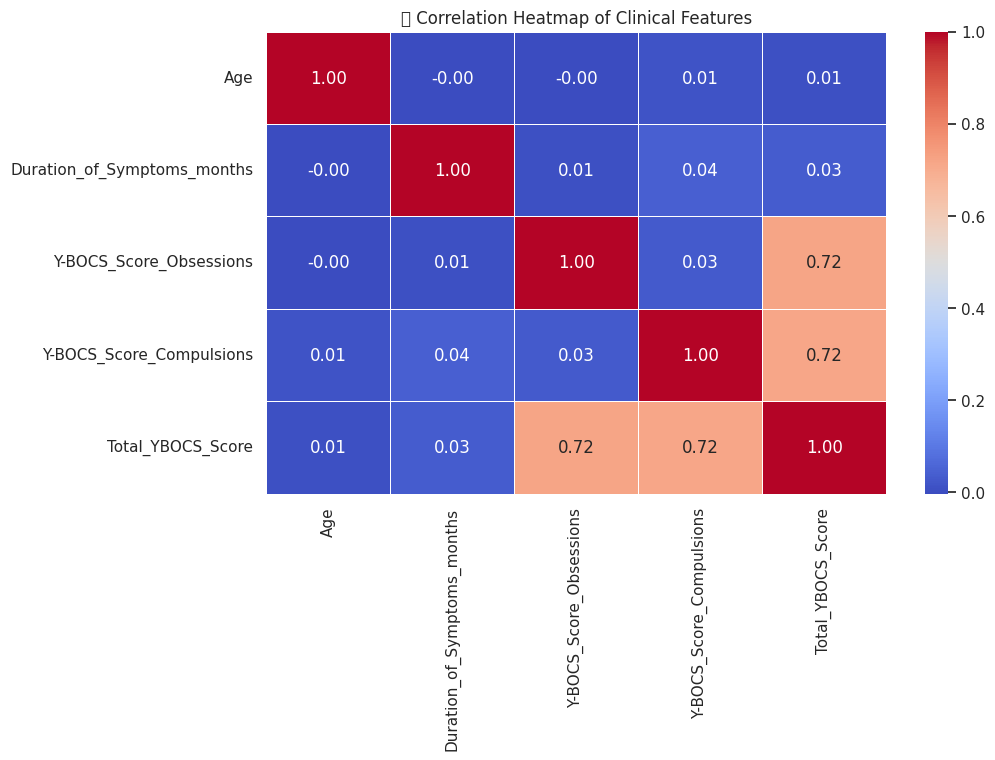

In [ ]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns with correct names
num_cols = [
    "Age",
    "Duration_of_Symptoms_months",
    "Y-BOCS_Score_Obsessions",
    "Y-BOCS_Score_Compulsions",
    "Total_YBOCS_Score"
]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Clinical Features")
plt.show()


In [3]:
# Re-run the code after reset to reload the data and compute everything again

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load cleaned OCD dataset
file_path = "/content/drive/MyDrive/Unified Projects Kanha Submission on 9 July/2 _ OCD Patient Dataset Demographics & Clinical Data/OCD_Cleaned_Data.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Create Total Y-BOCS Score if not present
if "Total_YBOCS_Score" not in df.columns:
    df["Total_YBOCS_Score"] = df["Y-BOCS_Score_Obsessions"] + df["Y-BOCS_Score_Compulsions"]

# Drop irrelevant columns
X = df.drop(["Total_YBOCS_Score", "OCD_Diagnosis_Date", "Patient_ID"], axis=1)
y = df["Total_YBOCS_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)

# Feature Importance
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Numeric summary statistics
summary_stats = {
    "Median": df.median(numeric_only=True),
    "Mode": df.mode(numeric_only=True).iloc[0],
    "Standard Deviation": df.std(numeric_only=True),
    "Correlation Matrix": df[["Age", "Duration_of_Symptoms_months",
                              "Y-BOCS_Score_Obsessions", "Y-BOCS_Score_Compulsions", "Total_YBOCS_Score"]].corr()
}

# Outputting all summary stats
summary_stats_text = {
    "Random Forest MAE": rf_mae,
    "Random Forest MSE": rf_mse,
    "Random Forest RMSE": rf_rmse,
    "Random Forest R2": rf_r2,
    "Random Forest CV R2 Scores": rf_cv_scores.tolist(),
    "Random Forest CV Mean R2": np.mean(rf_cv_scores),
    "Linear Regression R2": lr_r2,
    "Feature Importance Top 5": feat_df.head(5).to_dict(orient='records'),
    "Median": summary_stats["Median"].to_dict(),
    "Mode": summary_stats["Mode"].to_dict(),
    "Standard Deviation": summary_stats["Standard Deviation"].to_dict()
}

summary_stats_text


{'Random Forest MAE': 0.5687999999999998,
 'Random Forest MSE': 0.5995653333333331,
 'Random Forest RMSE': np.float64(0.7743160422807557),
 'Random Forest R2': 0.9979601887195362,
 'Random Forest CV R2 Scores': [0.9974502732905122,
  0.9982380766001726,
  0.9978508291743884,
  0.9976733728909448,
  0.9977856659153295],
 'Random Forest CV Mean R2': np.float64(0.9977996435742694),
 'Linear Regression R2': 1.0,
 'Feature Importance Top 5': [{'Feature': 'Y-BOCS_Score_Obsessions',
   'Importance': 0.501588258516169},
  {'Feature': 'Y-BOCS_Score_Compulsions', 'Importance': 0.494496841806669},
  {'Feature': 'Duration_of_Symptoms_months',
   'Importance': 0.00065809261746208},
  {'Feature': 'Age', 'Importance': 0.0006469361405910663},
  {'Feature': 'Anxiety_Diagnosis', 'Importance': 0.0001489340738408181}],
 'Median': {'Patient_ID': 5539.5,
  'Age': 47.0,
  'Gender': 0.0,
  'Duration_of_Symptoms_months': 121.0,
  'Family_History_of_OCD': 1.0,
  'Y-BOCS_Score_Obsessions': 20.0,
  'Y-BOCS_Score_